In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Data Preprocessing


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# Removing the last 3 columns as it contains most of null values
df.rename(columns={'v1':'target', 'v2':'text'},inplace = True)
df.sample(10)
          


,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
1659,ham,"Yeah, where's your class at?",NaN,NaN,NaN
4944,ham,Anyway I don't think I can secure anything up ...,NaN,NaN,NaN
5467,spam,Get your garden ready for summer with a FREE s...,NaN,NaN,NaN
5280,ham,"Vikky, come around &lt;TIME&gt; ..",NaN,NaN,NaN
4557,ham,PISS IS TALKING IS SOMEONE THAT REALISE U THAT...,NaN,NaN,NaN
1911,ham,Lol grr my mom is taking forever with my presc...,NaN,NaN,NaN
4546,ham,Hey mate. Spoke to the mag people. WeÛ÷re on....,NaN,NaN,NaN
1886,spam,Dear 0776xxxxxxx U've been invited to XCHAT. T...,NaN,NaN,NaN
4059,spam,This weeks SavaMob member offers are now acces...,NaN,NaN,NaN
1419,ham,\Speak only when you feel your words are bette...,NaN,NaN,NaN


In [10]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)
        

,target,text
1976,ham,Lol alright i was thinkin that too haha
2659,ham,Ok...
1337,ham,Then she buying today? ÌÏ no need to c meh...
2545,ham,So are you guys asking that i get that slipper...
3122,ham,He telling not to tell any one. If so treat fo...


In [11]:
#Removing duplicates
print(df.duplicated().sum())

403


In [12]:
df = df.drop_duplicates(keep='first')


In [13]:
print(df.duplicated().sum())

0


In [14]:
df.shape

(5169, 2)

# Exploratory Data Analysis

C:\Users\Muhammad Qasim\AppData\Local\Temp\ipykernel_20152\2896750720.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


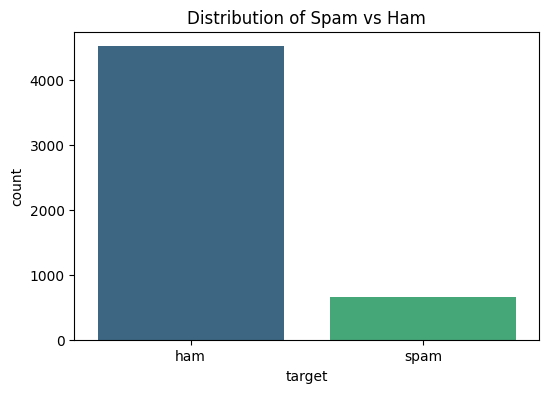

target
ham     4516
spam     653
Name: count, dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the 'target' column
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Distribution of Spam vs Ham')
plt.show()

df['target'].value_counts()

In [16]:
df['num_characters'] = df['text'].apply(len)


C:\Users\Muhammad Qasim\AppData\Local\Temp\ipykernel_20152\3217166257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [17]:
df.head()


,target,text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


C:\Users\Muhammad Qasim\AppData\Local\Temp\ipykernel_20152\2071812107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message_length'] = df['text'].apply(len)


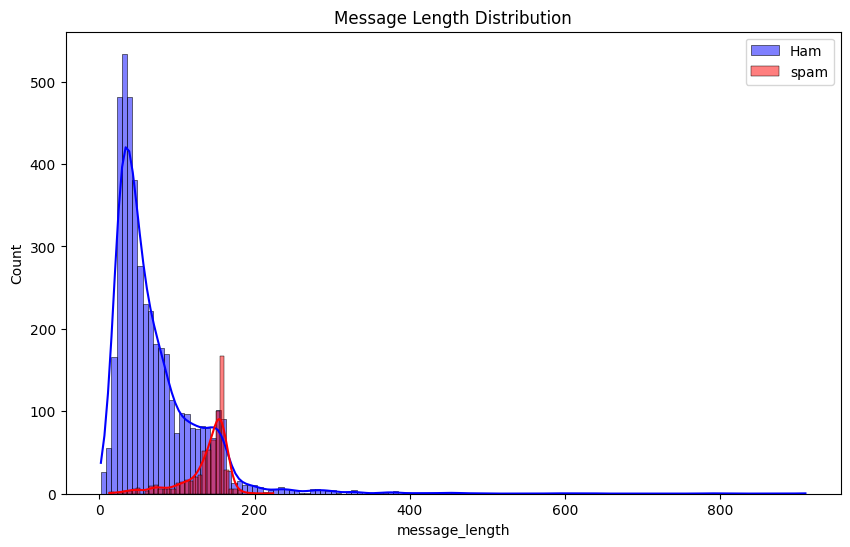

target
ham      70.459256
spam    137.891271
Name: message_length, dtype: float64

In [18]:
# Let us analyze the length of the messages, we may see there is a trend that spam messages are usually longer than legitimate messages
df['message_length'] = df['text'].apply(len)

plt.figure(figsize=(10,6))
sns.histplot(df[df['target']=='ham']['message_length'],color='blue',label='Ham',kde=True)
sns.histplot(df[df['target']=='spam']['message_length'],color='red',label='spam',kde=True)
plt.title("Message Length Distribution")
plt.legend()
plt.show()

# Calculate average length for each class
df.groupby('target')['message_length'].mean()

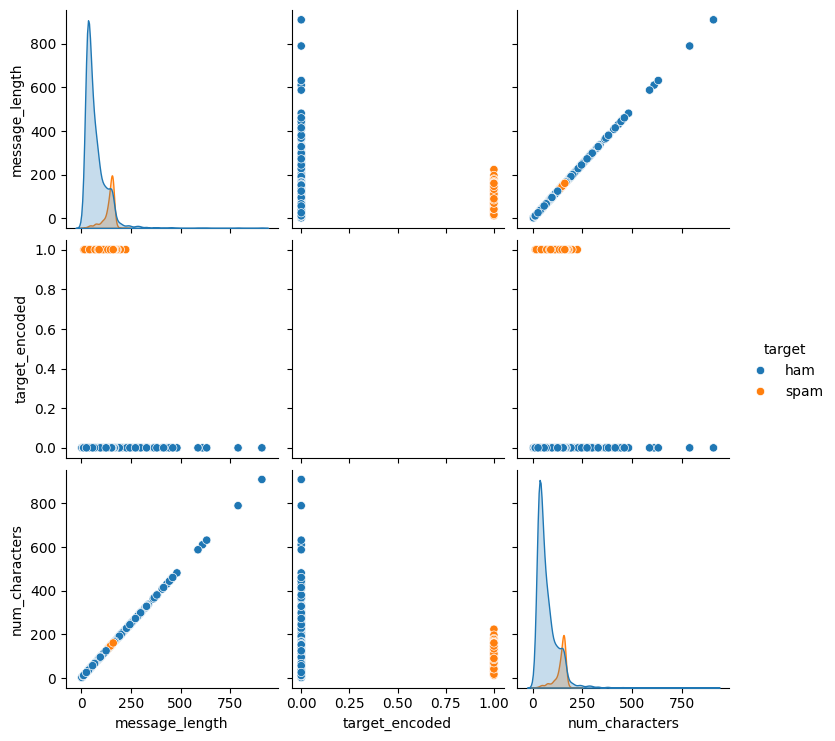

In [76]:
sns.pairplot(df,hue='target')


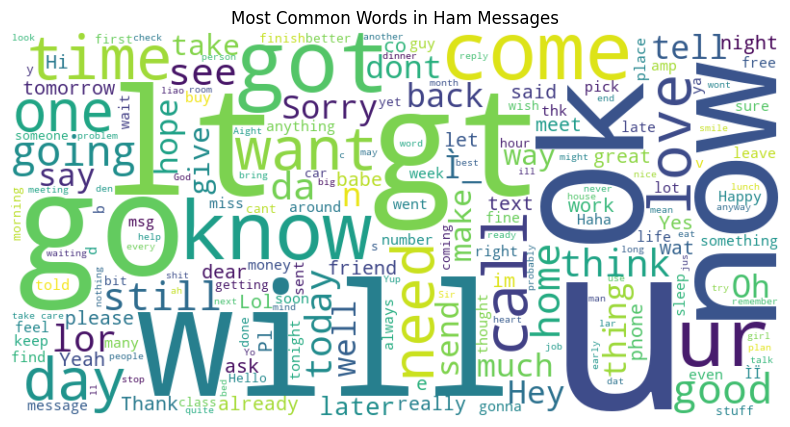

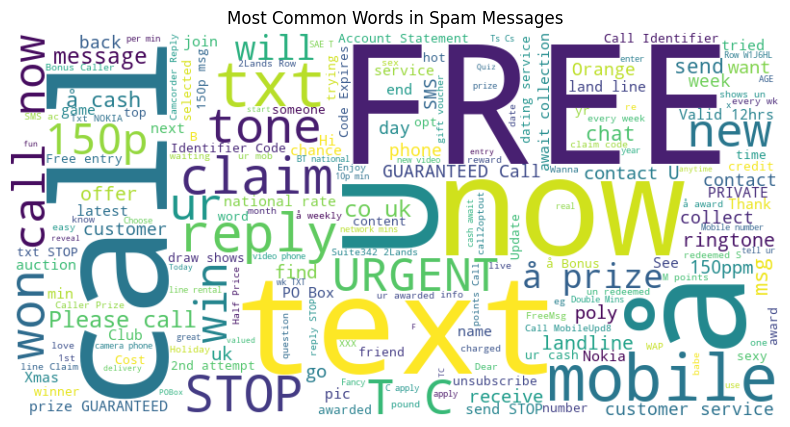

In [46]:
# Let us calculate work frequency Analysis showing which words are commom in spam or ham
from wordcloud import WordCloud

# Generate word cloud for ham messages
ham_words = ' '.join(df[df['target'] == 'ham']['text'])
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Ham Messages')
plt.show()

# Generate word cloud for spam messages
spam_words = ' '.join(df[df['target'] == 'spam']['text'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Spam Messages')
plt.show()



In [47]:
# Similarly we can find common phrases in spam and ham messages

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
unigram = vectorizer.fit_transform(df['text'])
unigram_counts = pd.DataFrame(unigram.sum(axis=0), columns=vectorizer.get_feature_names_out()).T
unigram_counts.columns = ['Frequency']
unigram_counts.sort_values(by='Frequency', ascending=False).head(10)

# Bigram (two-word sequence frequency)
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigram = bigram_vectorizer.fit_transform(df['text'])
bigram_counts = pd.DataFrame(bigram.sum(axis=0), columns=bigram_vectorizer.get_feature_names_out()).T
bigram_counts.columns = ['Frequency']
bigram_counts.sort_values(by='Frequency', ascending=False).head(10)

,Frequency
lt gt,254
let know,40
good morning,24
don know,24
just got,21
new year,21
po box,21
prize guaranteed,20
ok lor,19
send stop,19


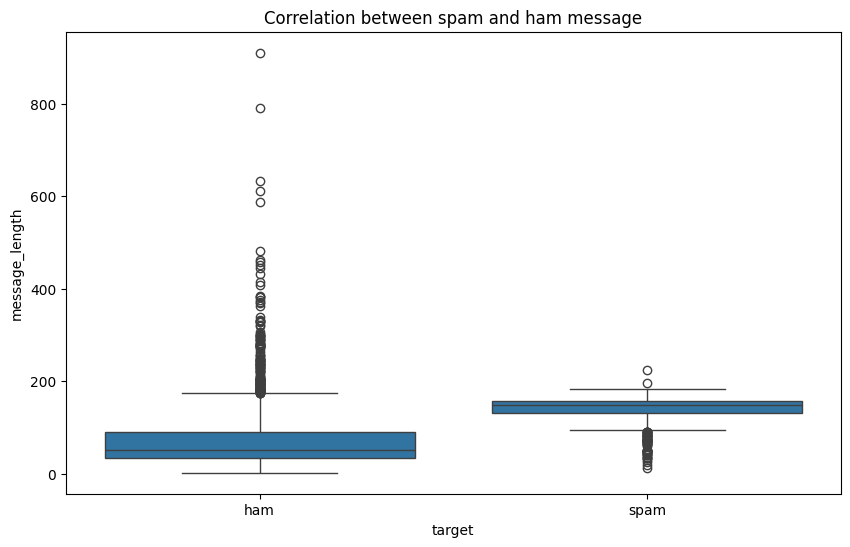

In [48]:
# Correlation between length and spam message

plt.figure(figsize=(10,6))
sns.boxplot(x='target',y='message_length',data=df)
plt.title("Correlation between spam and ham message")
plt.show()

In [49]:

from collections import Counter

ham_words = ' '.join(df[df['target']=='ham']['text']).split()
spam_words = ' '.join(df[df['target']=='spam']['text']).split()

ham_word_frequency = Counter(ham_words).most_common(10)
spam_word_frequency = Counter(spam_words).most_common(10)

print("Most common words in ham messages is :" ,ham_word_frequency)
print("Most common words in spam messages is :" ,spam_word_frequency)

Most common words in ham messages is : [('to', 1450), ('you', 1412), ('I', 1349), ('the', 954), ('a', 884), ('i', 714), ('and', 712), ('in', 677), ('u', 576), ('my', 570)]
Most common words in spam messages is : [('to', 522), ('a', 314), ('your', 171), ('call', 163), ('the', 160), ('or', 155), ('for', 152), ('2', 151), ('you', 150), ('is', 130)]


# Data Preprocessing

In [19]:
#Bring all the text to lowercase

df['clean_text'] = df['text'].str.lower()

C:\Users\Muhammad Qasim\AppData\Local\Temp\ipykernel_20152\1886182784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['text'].str.lower()


In [20]:
# Removing Punctuation

import string

df['clean_text'] = df['clean_text'].str.replace(f'[{string.punctuation}]', '', regex=True)

C:\Users\Muhammad Qasim\AppData\Local\Temp\ipykernel_20152\19081270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['clean_text'].str.replace(f'[{string.punctuation}]', '', regex=True)


In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df.loc[:, 'clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
                                

In [59]:
import nltk

# Download the 'punkt' tokenizer data
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\Muhammad
[nltk_data]     Qasim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [65]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Gaming')

'game'

In [ ]:
from nltk.tokenize import word_tokenize

# Tokenize the text
df['tokens'] = df['clean_text'].apply(word_tokenize)


In [ ]:
from nltk.stem import WordNetLemmatizer

# Download WordNet Lemmatizer resources
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))


In [ ]:
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Apply stemming
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))


# Model Building

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=3000)  

# Fit and transform the cleaned text
X = tfidf.fit_transform(df['clean_text'])

# Save the fitted vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')  # Save the vectorizer


['tfidf_vectorizer.pkl']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Naive Bayes classifier
nb = MultinomialNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)


print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1331
           1       1.00      0.78      0.87       220

    accuracy                           0.97      1551
   macro avg       0.98      0.89      0.93      1551
weighted avg       0.97      0.97      0.97      1551

Accuracy: 0.968407479045777


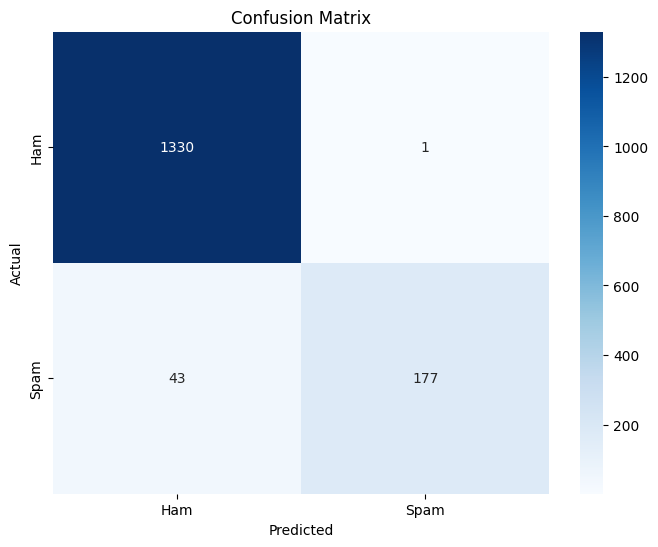

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
y_pred = nb.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [23]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1331
           1       1.00      0.78      0.87       220

    accuracy                           0.97      1551
   macro avg       0.98      0.89      0.93      1551
weighted avg       0.97      0.97      0.97      1551



In [24]:
# accuracy score if necessary
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.97


In [25]:
import joblib

# Save the model
joblib.dump(nb, 'spam_detector_model.pkl')

['spam_detector_model.pkl']